# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## **_**Data Validation **_**

The dataset has  947 rows and 8 columns :
  * Recipe : IDs values are represented numerically and they don't need any cleaning / the same thing for the description
  * The "Calories" column : numerical , it contains missing values
  * The "Carbohydrates" column : numerical , it contains missing values
  * The "sugar" column : numercial , it has missing values
  * The "Protein" column : numerical , it contains missing values
  * The "Category" column :  11 unique values without missing values
  * The "Servings" column : not totally numerical because we have some values that contains text without any missing values
  * The "High-traffic" column : strings with missing values

We start by importing the DataSet

In [1]:
import pandas as pd
import numpy as np 
import warnings

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv', sep=",",index_col='recipe')
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN


We display some info about the dataset for more understanding the columns and their types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


We display statistical infos about the columns

In [4]:
df.describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296
std,453.020997,43.949032,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


We describe the columns that contains strings 

In [5]:
df.describe(include='O')

,category,servings,high_traffic
count,947,947,574
unique,11,6,1
top,Breakfast,4,High
freq,106,389,574


Now , we display the column "Category" to see the recipe's categories

In [6]:
df['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

we can discover from the categories that we actually have 11 categories instead of 10

Now , we display "servings" column 

In [7]:
df['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

we can constat from servings column that it should be numerical but due to "2 as sncak" , it fails to match this description and we will fix it the the cleaning

Now , we display the "high-traffic" column 

In [8]:
df['high_traffic'].value_counts()

High    574
Name: high_traffic, dtype: int64

_**Data Cleaning**_

*Filling the missing value with the appopriate solution
*Encoding the data from stings to non numeric variables

We start in the first place by handling the missing values. We will first identify the columns to treat:

In [9]:
df.isna().sum()

calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

We can constat that we have missing values in 5 columns:
   * calories
   * carbohydrate
   * sugar
   * protein
   * high_traffic


We will begin by treating the target variable:
   We can notice that the values in the "high_traffic" are shown where the high_traffic = "High" .So, we can conclude that the
   missing values are just the low traffic recupes. Therefore, we will fill the NaN by "Low"

In [10]:
df1 = df["high_traffic"].fillna("Low")
df["high_traffic"]= df1
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,Low
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,Low


Now, we have to think about treating the missing values in the features columns. We can replace the missing values in these columns bu 0 but this can be misleading beacuse every recipe have a specific amount of calories/sugar/protein/carbohydrate. So we have only 2 methods to deal with the missing values
    * Drop the rows that have missing values
    * Fill the missing values with a statistical method which should be (mean/median)
The first method can be dangerous because we could loose an important informations and if the missing values in a colomn isn't in the same row as the missing value of another column we will have a big loss of informations. In our case the worst sceanario that we can have is a loss of 4 * 52 =208 rows which it represents about 1/4 of the total rows in the dataset(947).But if the missing values are from the same recipe which mean in the same row we will delete only 52 rows which represents about 5% of all rows .So the method will be very good to handle missing values
Unfortunately, For our dataset, the missing values would be Missing Completly at Random (MCAR)

In [11]:
df2 = df[pd.isna(df["calories"])].reset_index()
df2

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,24,NaN,NaN,NaN,NaN,Meat,2,Low
2,49,NaN,NaN,NaN,NaN,Chicken Breast,4,Low
3,83,NaN,NaN,NaN,NaN,Meat,4,High
4,90,NaN,NaN,NaN,NaN,Pork,6,High
5,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
6,122,NaN,NaN,NaN,NaN,Dessert,2,High
7,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
8,150,NaN,NaN,NaN,NaN,Potato,2,High
9,188,NaN,NaN,NaN,NaN,Pork,4,High


We can notice that the missing values for the 4 features are in the same rows every time. So if one value is missing we are certain that the other variables will be missing too .So , we can conclude that we are in a MCAR case!!!

After analyzing the first method of dropping the missing values, we will prefer to use a median/mean method to treat the missing values.
We will need to decide which statistical method to use . We will check the existance of outliers , if we find an important proportion of outliers we would prefer the use of median method, Else , we prefer using the mean imputation
We will use the IQR method to check the presence of outliers:

In [12]:
outliers = {}

columns = ["calories", "carbohydrate", "sugar", "protein"]

for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()

for column, count in outliers.items():
    print(f"Outliers in {column}: {count}")

Outliers in calories: 47
Outliers in carbohydrate: 58
Outliers in sugar: 79
Outliers in protein: 77


Since we have outliers , we will use the median method to fill the missing values 

In [13]:
df[columns] = df[columns].fillna(df[columns].median())
df.isna().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

Now, finally we have edited all the missing values 

In [14]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,288.55,21.48,4.55,10.80,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,Low
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,Low


Finally, we have finished handling the missing values in the five colomns by using the mdian method for (calories/carbohydrates/suger/protein) and we replace the missing values in the target variable (traffic_high) by "Low"

Now we will pass to transform some types of other varibales

In [15]:
df.dtypes

calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

We have to transform the columns "category" and "high_traffic" to categorical varibales and then encode them to numeric variables so they can be handled by ML algorithms 

In [16]:
df["high_traffic"] = df["high_traffic"].astype("category")
df["category"] = df["category"].astype("category")
df.dtypes

calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings          object
high_traffic    category
dtype: object

In [17]:
df["category"].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Dessert            83
Vegetable          83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

we have 11 categories instead of 10 categories due to the presence of "Chicken Breast" instead of "Chicken" ,So we have to fix it so we will get the 10 unique categories expected

In [18]:
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')
df['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Dessert           83
Vegetable         83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

Now we will fix the "servings" columns by replacing the nom numericals values by numerical values

In [19]:
# Convert 'servings' column to strings
df['servings'] = df['servings'].astype(str)

# Replace the specified string and convert back to numeric values
df['servings'] = df['servings'].str.replace(' as a snack', '').astype("int64")
df['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

Now , we will treat the "High_traffic" column by repalcing the "High" value by 1 and "Low" value by 0

In [20]:
df['high_traffic_numeric'] = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0).astype("int64")
df['high_traffic_numeric'].value_counts()

1    574
0    373
Name: high_traffic_numeric, dtype: int64

Now , last check up on the types of our columns:

In [21]:
df.dtypes

calories                 float64
carbohydrate             float64
sugar                    float64
protein                  float64
category                category
servings                   int64
high_traffic            category
high_traffic_numeric       int64
dtype: object

Last but not least, we will check if we have some duplicated values

In [22]:
duplicate_rows = df[df.duplicated(keep=False)]
if not duplicate_rows.empty:
    print("Duplicated rows:")
    print(duplicate_rows)
else:
    print("No duplicated rows.")

Duplicated rows:
        calories  carbohydrate  ...  high_traffic  high_traffic_numeric
recipe                          ...                                    
1         288.55         21.48  ...          High                     1
24        288.55         21.48  ...           Low                     0
49        288.55         21.48  ...           Low                     0
83        288.55         21.48  ...          High                     1
90        288.55         21.48  ...          High                     1
117       288.55         21.48  ...          High                     1
122       288.55         21.48  ...          High                     1
150       288.55         21.48  ...          High                     1
188       288.55         21.48  ...          High                     1
210       288.55         21.48  ...          High                     1
213       288.55         21.48  ...          High                     1
263       288.55         21.48  ...           L

We have 25 rows that are duplicated so we will drop them!!

In [23]:
df.drop_duplicates().shape

(922, 8)

### _**Conclusion** _

We begin by importing our dataframe, we have found a 52 missing values for the features columns(calories, protein, carbohydrates and suger), we have found that these missing values are Missing Completely At Random .In other words, the missing data points are a result of a completely random process. So we handle the missing values by replacing them with the median method due to the presence of outliers . For the target value ("High_traffic") we handle the missing values by replacing them with "Low" . Then , we correct the types of the columns "servings", "category" and "high_traffic". Moreover we fix the number of categories and at last , we remove the duplicates
Finally we have:
    * recipe : unique numerical IDs without missing values ,set to index
    * calories: numerical values with outliers with replacing missing values by median
    * carbohydrate: numerical values with outliers with replacing missing values by median 
    * sugar: numerical values with outliers with replacing missing values by median 
    * protein: numerical values with outliers with replacing missing values by median 
    * category: transformation to categorical column and identifying the 10 unique values
    * servings: cleaning from texts values and transformation to numerical values
    * high_traffic: filling the missing values with "Low" and transformation to categorical value

**EXPLANATORY _ANALYSIS**_

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

The pair plot gives important insights into the distribution of data and enriches the visualization by incorporating color the represent the distributiion of the classes we are trying to predict across each feature, so we can notice patterns in the graph

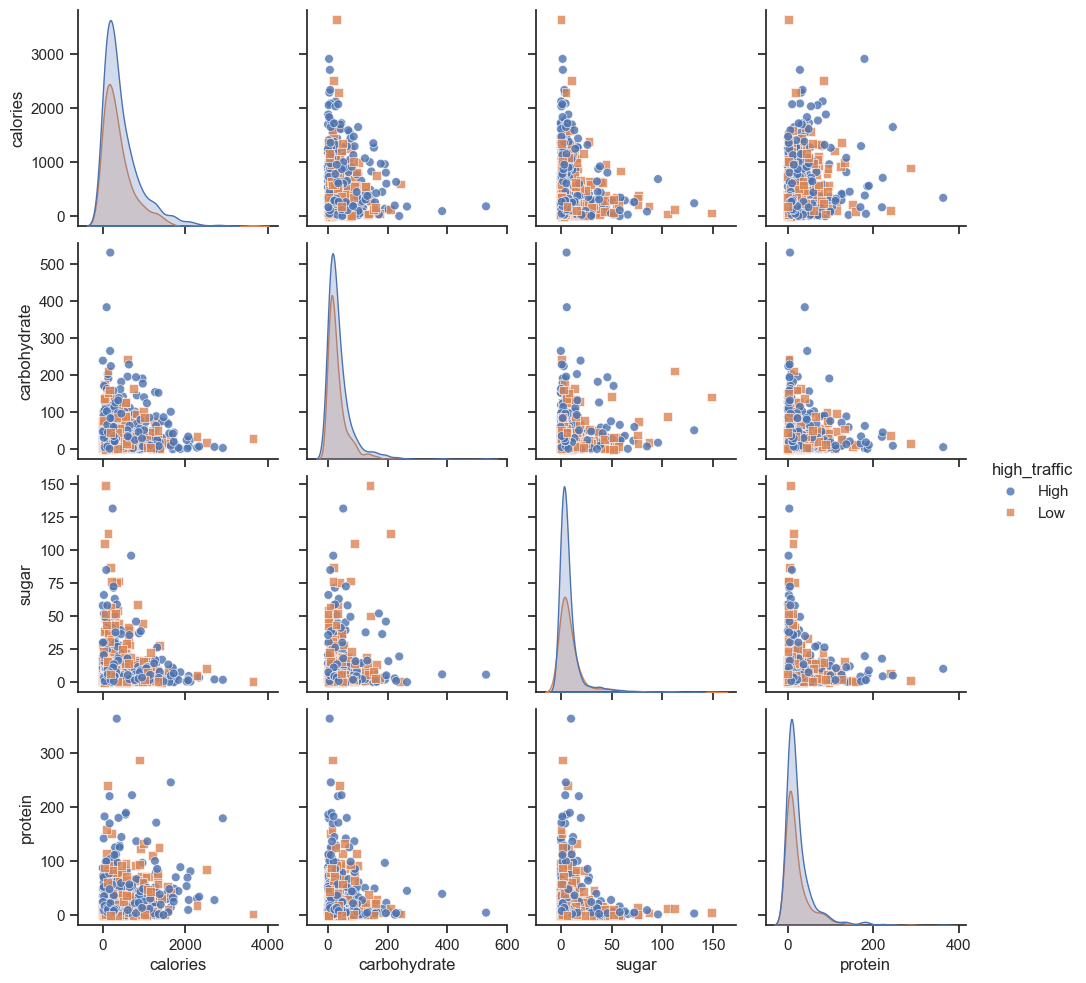

In [34]:
columns_of_interest = ['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic']

sns.set(style="ticks")
sns.pairplot(data=df[columns_of_interest], hue='high_traffic', plot_kws={'alpha':0.8, 's': 40}, markers=['o', 's'])

plt.show()

Now , we try to visualize the realtion with target value("High_traffic"):

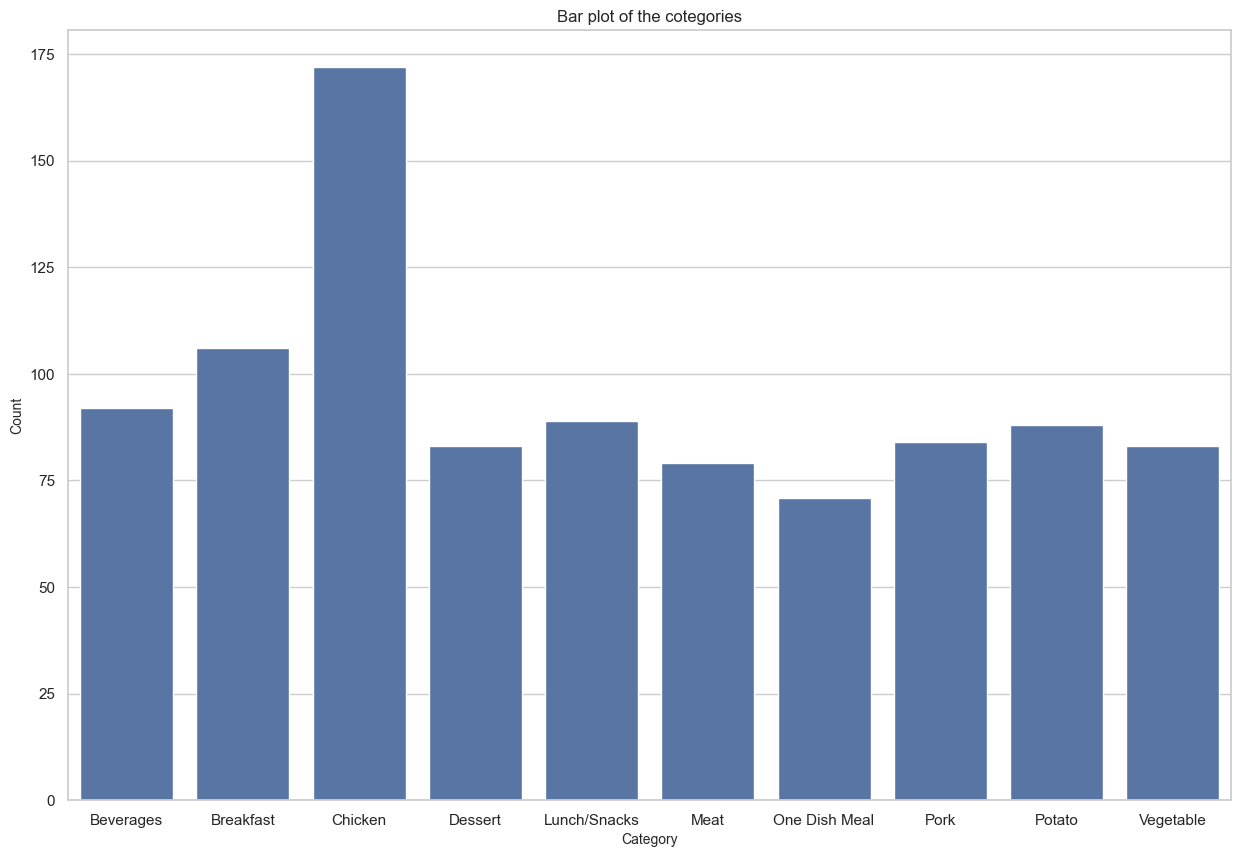

In [35]:
plt.figure(figsize=(15, 10))

sns.set(style="whitegrid")  
sns.countplot(data=df, x='category')

plt.title("Bar plot of the cotegories", fontsize=12)
plt.xlabel("Category", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.show()

This graph give us an idea of the amount of variable category , we can conclude that the proportion is the same except for chicken recipes

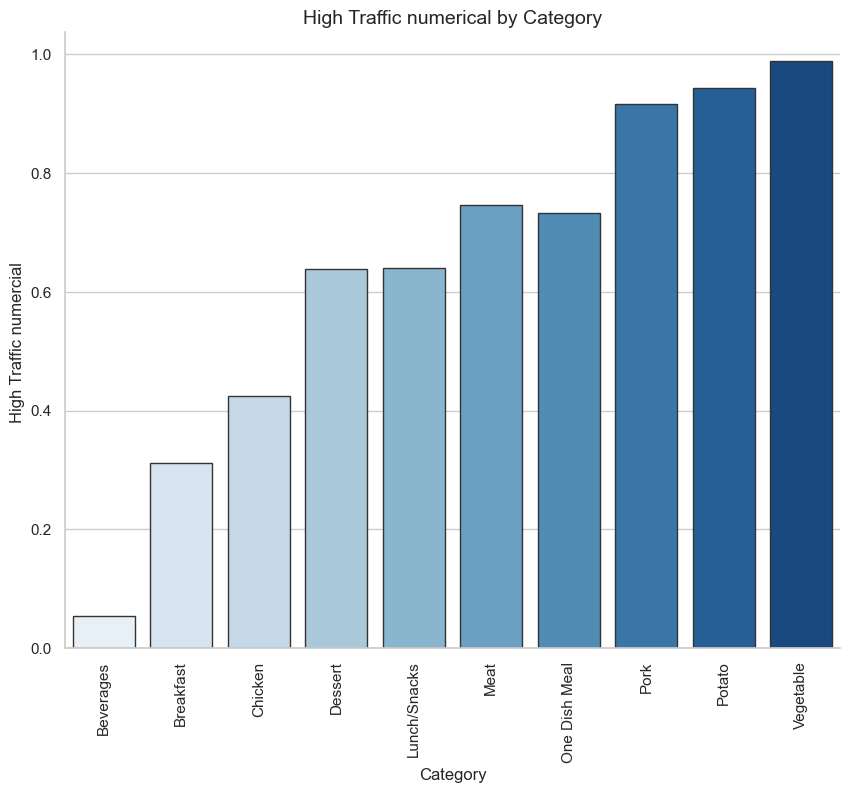

In [36]:
plt.figure(figsize=(10, 8))

sns.barplot(x='category', y='high_traffic_numeric', data=df, ci=None, palette="Blues", edgecolor=".2")

plt.xticks(rotation=90)

plt.title("High Traffic numerical by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("High Traffic numercial ", fontsize=12)

sns.despine()

plt.show()

this graph provides us with the most popular/requested recipes . We can notice that Vegetables/potato/pork are the most requested recipes!

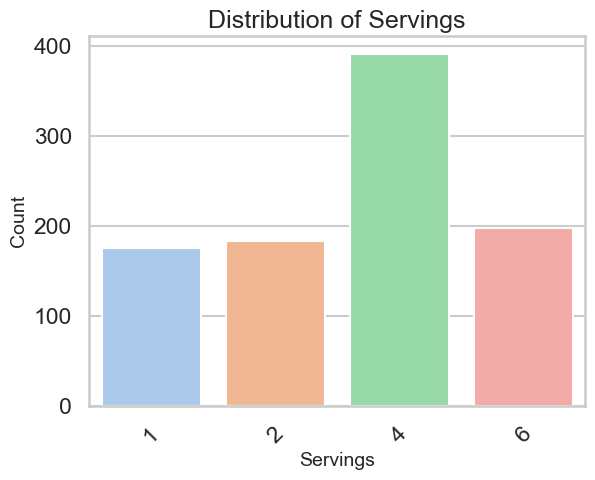

In [37]:
sns.set(style="whitegrid", context="talk")

sns.countplot(x="servings", data=df, palette="pastel")

plt.title("Distribution of Servings", fontsize=18)

plt.xlabel("Servings", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45)

plt.show()

This graph allows us to easily notice that among the recipes with four servings, there is a significant spike in numbers, while the remaining ones are uniformly spread out.

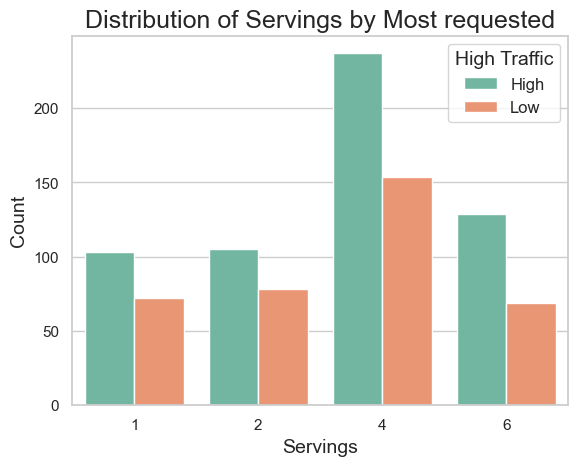

In [38]:
sns.set(style="whitegrid", context="notebook")

sns.countplot(x="servings", hue="high_traffic", data=df, palette="Set2", dodge=True)

plt.title("Distribution of Servings by Most requested", fontsize=18)

plt.xlabel("Servings", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend(title="High Traffic", title_fontsize='14', fontsize='12', loc='upper right')


plt.show()

the popularity's amount doesn't change with the number of servings 

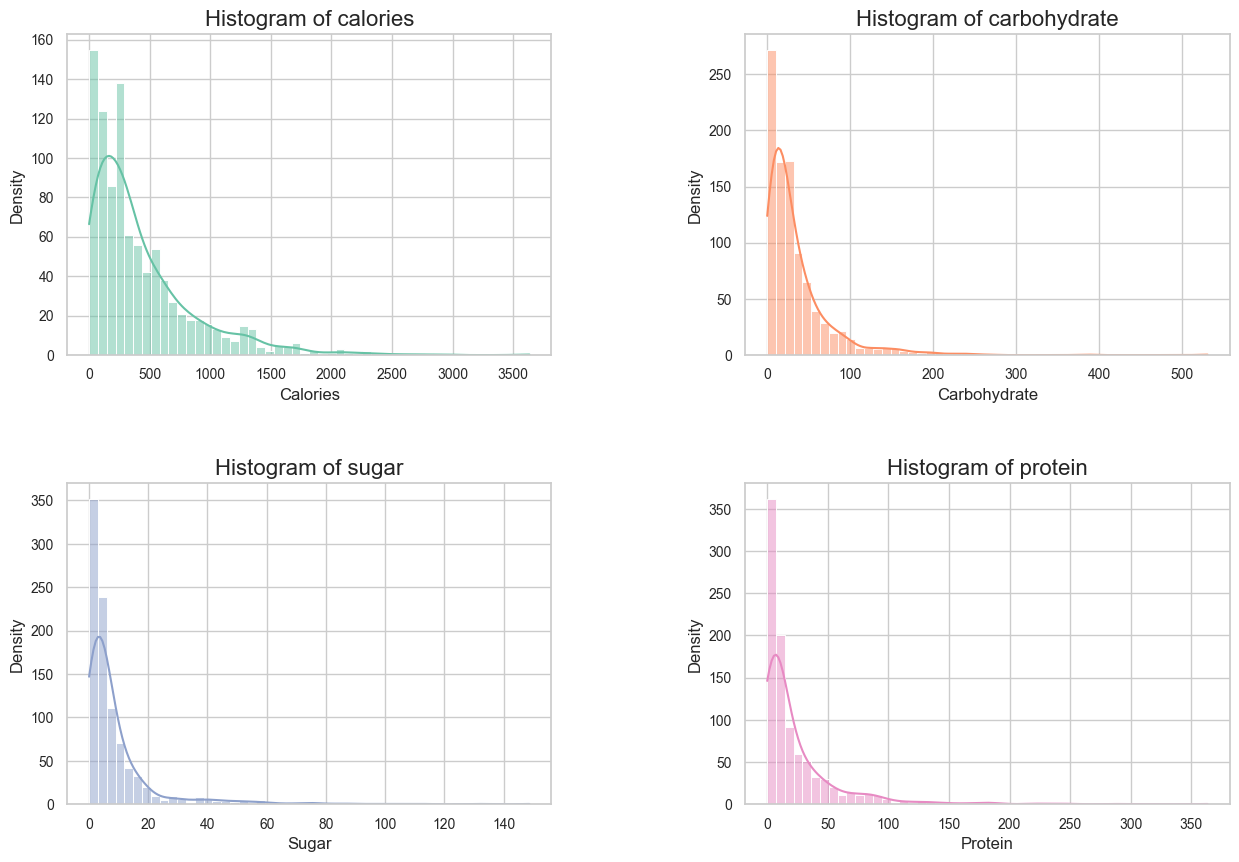

In [39]:
numerical_columns = ["calories", "carbohydrate", "sugar", "protein"]

colors = sns.color_palette("Set2")

with sns.axes_style("whitegrid"):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()

    for i, (col, color) in enumerate(zip(numerical_columns, colors)):
        ax = axs[i]
        sns.histplot(df[col], kde=True, bins=50, ax=ax, color=color)
        ax.set_title(f"Histogram of {col}", fontsize=16)
        
        ax.set_xlabel(col.capitalize(), fontsize=12)
        ax.set_ylabel("Density", fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)

    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.show()

In simpler terms, our nutritional data displays a right-skewed distribution. To meet the normality assumptions required for modeling, we might consider transforming these variables. From a business perspective, it's crucial to note that our website's recipes exhibit a wide range of nutritional values. For example, calorie content can range from as low as 350 to as high as 3500 grams, and protein content varies from 0 to 200 grams in different recipes.

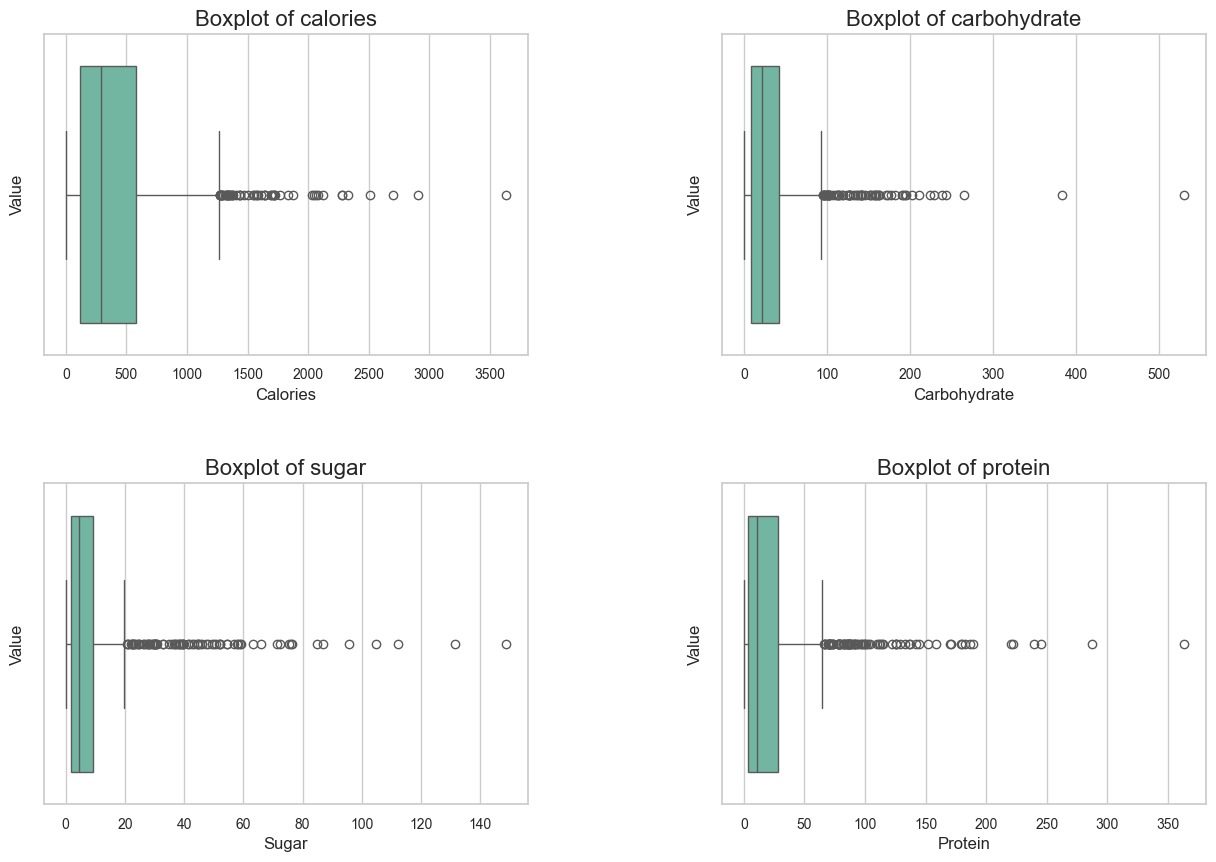

In [40]:
numerical_columns = ["calories", "carbohydrate", "sugar", "protein"]

with sns.axes_style("whitegrid"):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()

    for i, col in enumerate(numerical_columns):
        ax = axs[i]
        sns.boxplot(x=col, data=df, ax=ax, palette="Set2")
        ax.set_title(f"Boxplot of {col}", fontsize=16)
        
        ax.set_xlabel(col.capitalize(), fontsize=12)
        ax.set_ylabel("Value", fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)

    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.show()

We remark the existance of outliers at the left of every diagram and the different scales .So we will change these variables to fit the machine learning algorithms.

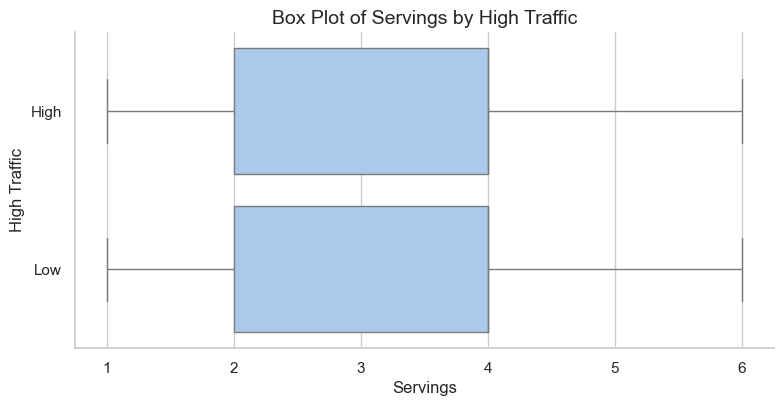

In [57]:
sns.set(style="whitegrid", palette="pastel")

sns.catplot(y="high_traffic", x="servings", data=df, kind="box", height=4, aspect=2)

plt.xlabel("Servings", fontsize=12)
plt.ylabel("High Traffic", fontsize=12)
plt.title("Box Plot of Servings by High Traffic", fontsize=14)

plt.show()

We notice that servings distribution doesn't change with the most requested recipes

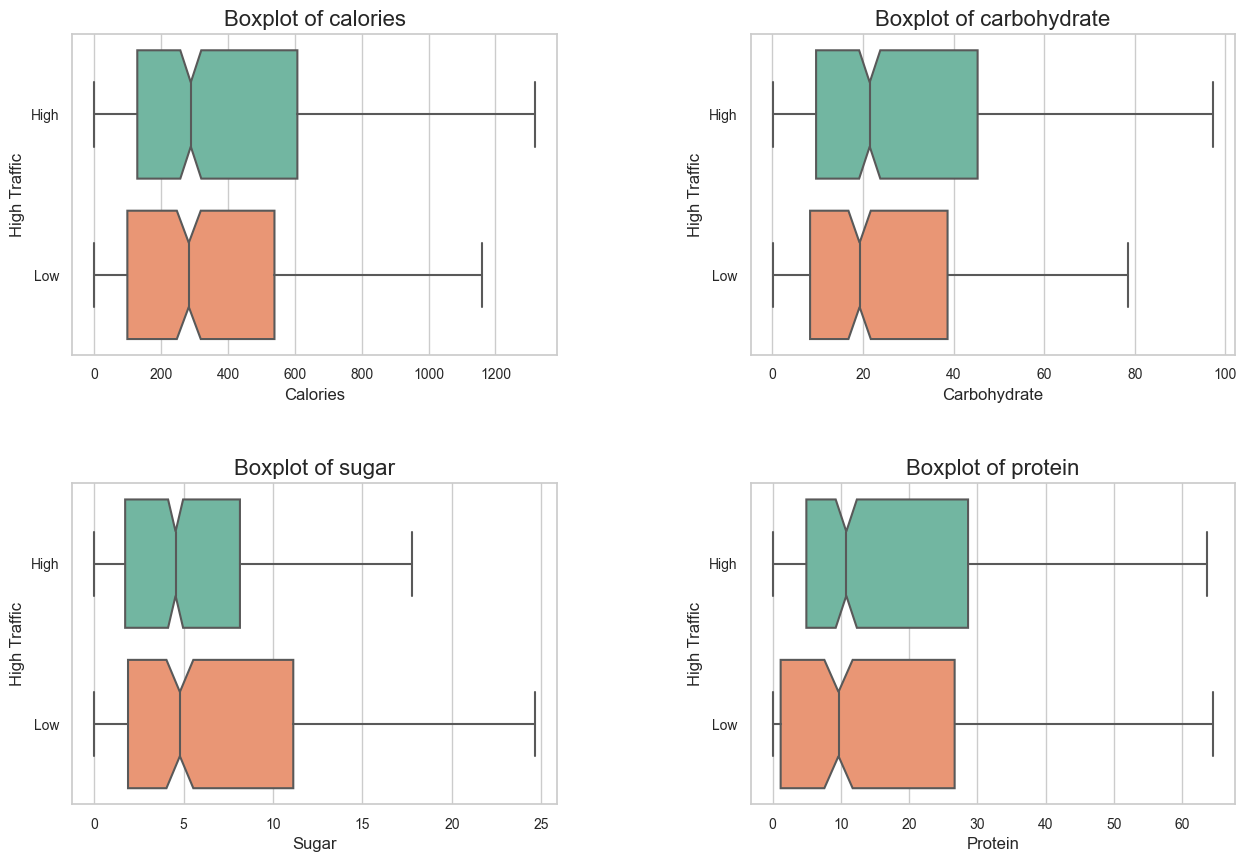

In [97]:
numerical_columns = ["calories", "carbohydrate", "sugar", "protein"]

sns.set(style="whitegrid", palette="pastel")

with sns.axes_style("whitegrid"):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()

    for i, col in enumerate(numerical_columns):
        ax = axs[i]
        sns.boxplot(y="high_traffic", x=col, data=df, sym="", ax=ax, notch=True, palette="Set2")
        ax.set_title(f"Boxplot of {col}", fontsize=16)
        
        ax.set_xlabel(col.capitalize(), fontsize=12)
        ax.set_ylabel("High Traffic", fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)

    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.show()

We can notice taht there are distinct patterns in the nutritional variables of popular and unpopular recipes. This suggests a potential connection between these variables and our target outcome.

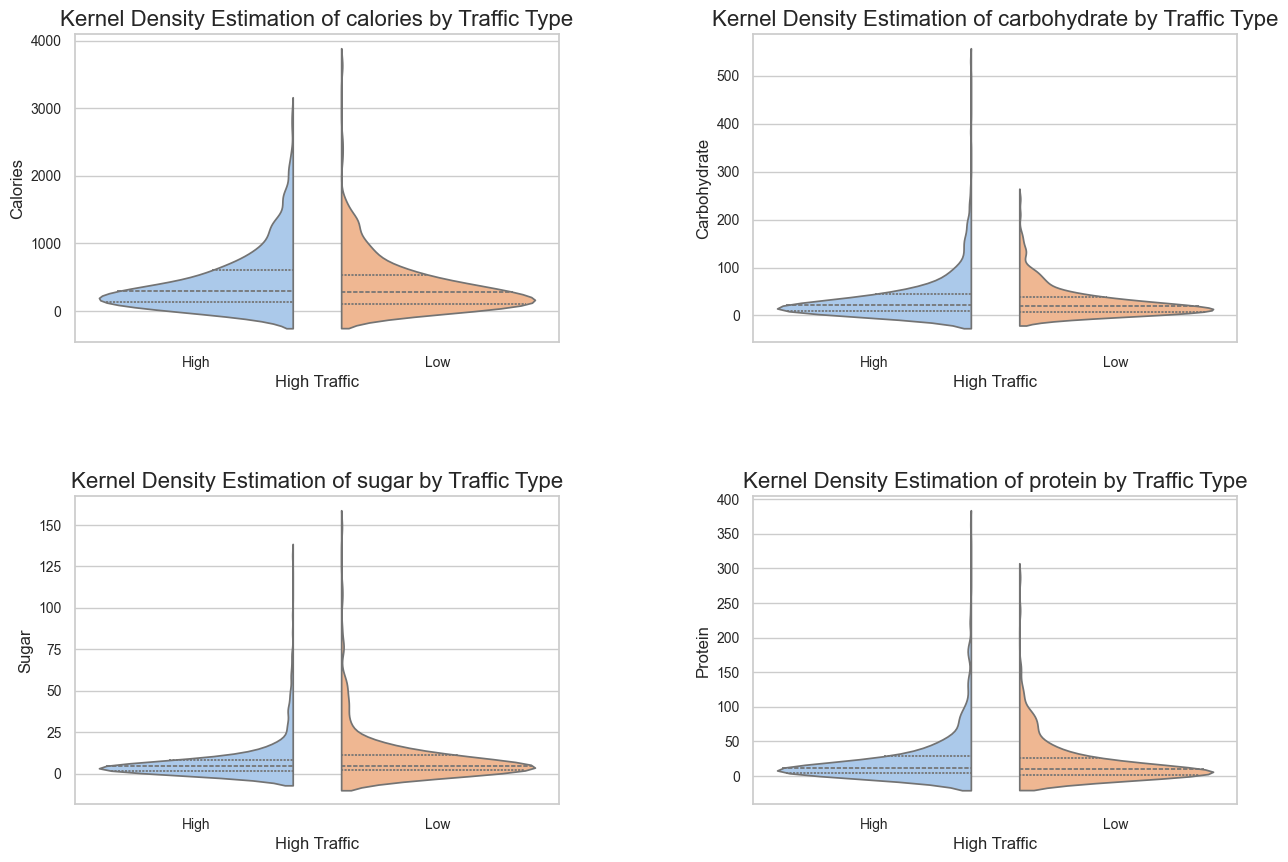

In [59]:
numerical_columns = ["calories", "carbohydrate", "sugar", "protein"]
palette = sns.color_palette("pastel")

with sns.axes_style("whitegrid"):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()

    for i, col in enumerate(numerical_columns):
        ax = axs[i]
        sns.violinplot(data=df, hue='high_traffic', y=col, x='high_traffic', ax=ax, split=True, inner="quart", palette=palette)
        ax.set_title(f"Kernel Density Estimation of {col} by Traffic Type", fontsize=16)
        
        ax.set_xlabel("High Traffic", fontsize=12)
        ax.set_ylabel(col.capitalize(), fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)

    plt.subplots_adjust(hspace=0.5, wspace=0.4)

    plt.show()

Once again, we notice slight discrepancies in the distributions based on popularity. However, this observation doesn't hold entirely true for protein, as the violin plots exhibit similar shapes, and the means appear to be very close to each other.

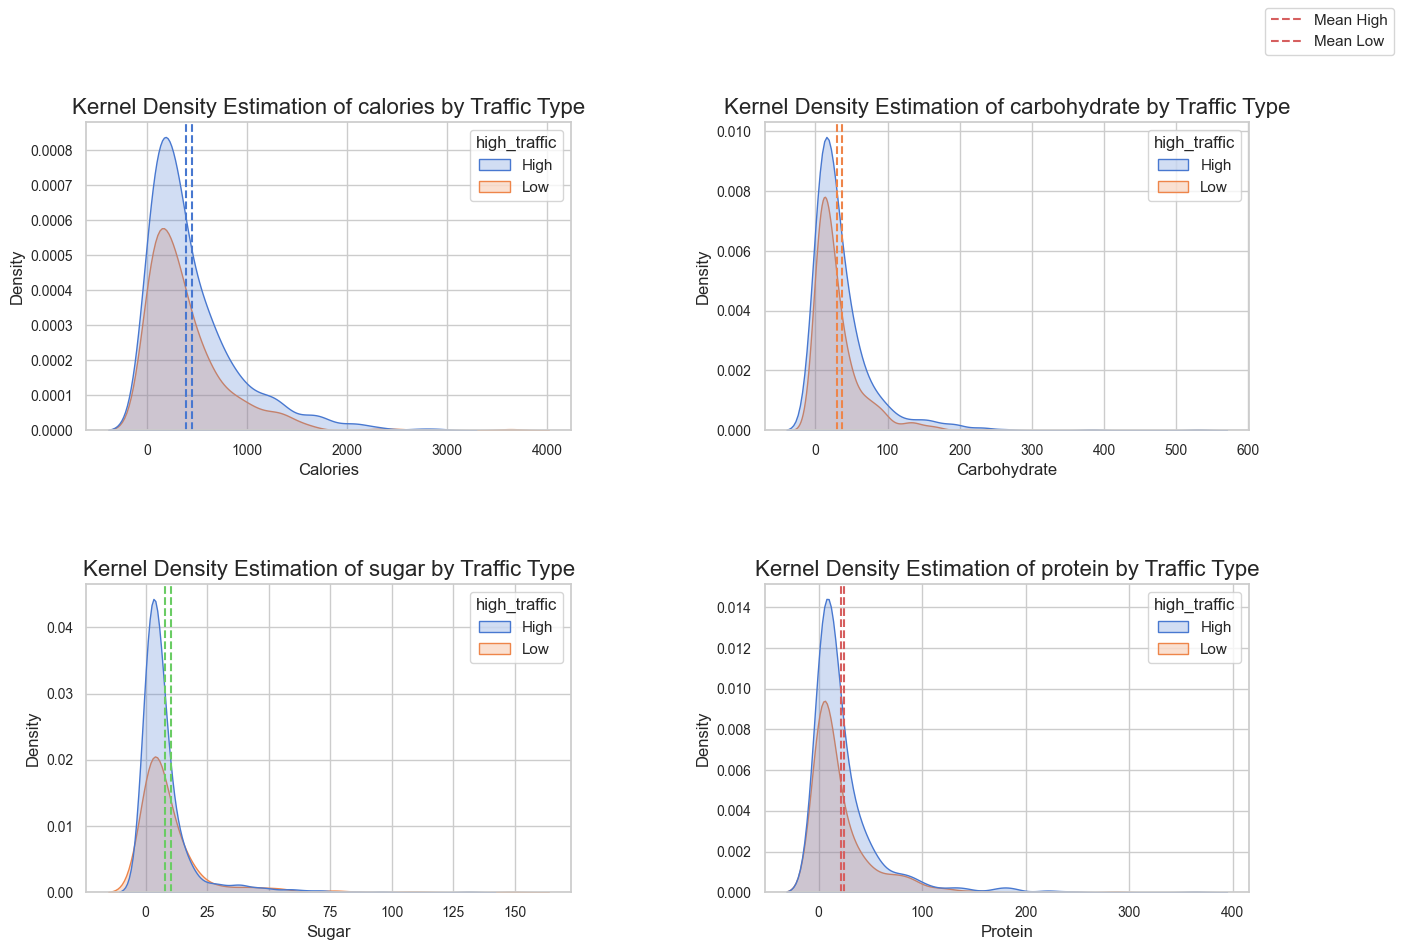

In [104]:
numerical_columns = ["calories", "carbohydrate", "sugar", "protein"]
custom_palette = sns.color_palette("muted")

with sns.axes_style("whitegrid"):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()

    for i, col in enumerate(numerical_columns):
        ax = axs[i]
        sns.kdeplot(data=df, hue='high_traffic', x=col, shade=True, ax=ax, palette=custom_palette)
        ax.set_title(f"Kernel Density Estimation of {col} by Traffic Type", fontsize=16)

        means = df.groupby('high_traffic')[col].mean()
        for traffic_type, mean in means.items():
            color = custom_palette[i] 
            ax.axvline(mean, color=color, linestyle='--', label=f'Mean {traffic_type}')

        ax.set_xlabel(col.capitalize(), fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)

    plt.subplots_adjust(hspace=0.5, wspace=0.4)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    plt.show()

The graph indicates that there are mean differences between the nutritional variables' distributions based on website traffic. However, these differences in means are relatively small, as evident from the data.
Let's see if we have a difference in the mean with ttest :

In [115]:
import scipy.stats as stats
for i, col in enumerate(numerical_columns):
    column_high_request= df[df['high_traffic'] == 'High'][col]
    column_low_request = df[df['high_traffic'] == 'Low'][col]

    t_statistic, p_value = stats.ttest_ind(column_high_request, column_low_request)
    print(f"T-statistic differences for mean {col} : {t_statistic:.3f}")
    print(f"P-value differences for mean {col}: {p_value:.3f}")

T-statistic differences for mean calories : 2.063
P-value differences for mean calories: 0.039
T-statistic differences for mean carbohydrate : 2.269
P-value differences for mean carbohydrate: 0.023
T-statistic differences for mean sugar : -2.423
P-value differences for mean sugar: 0.016
T-statistic differences for mean protein : 1.146
P-value differences for mean protein: 0.252


Example Analysis: There is a notable disparity in mean sugar content between requested and unrequested recipes.

To sum up: Based on the conducted t-tests and graphical representations, it is evident that there is a significant mean difference in nutritional variables between popular and non-popular recipes. However, this disparity does not apply to protein content, where there is no significant difference between requested and non-requested recipes. This suggests a potential connection between nutritional variables and recipe popularity.

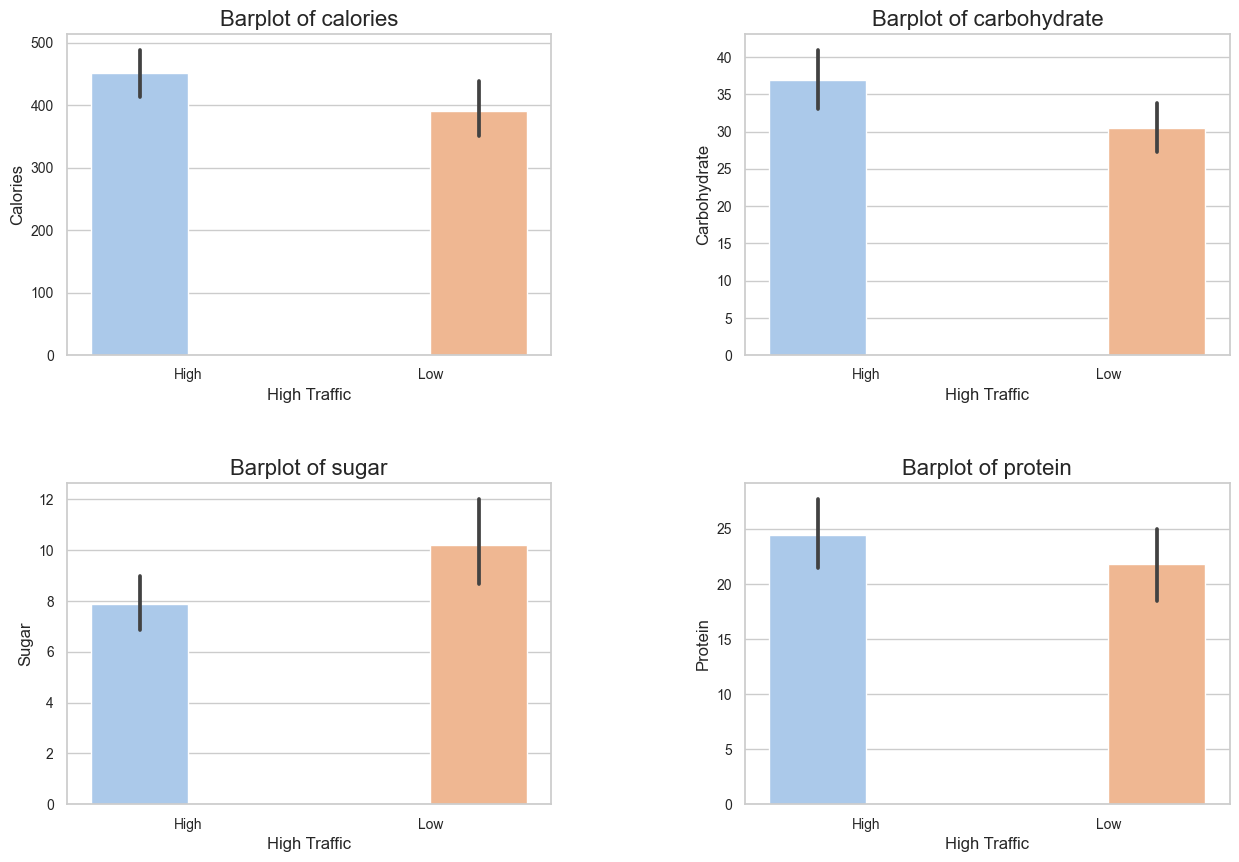

In [116]:
numerical_columns = ["calories", "carbohydrate", "sugar", "protein"]
custom_palette = sns.color_palette("pastel")

with sns.axes_style("whitegrid"):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()

    for i, col in enumerate(numerical_columns):
        ax = axs[i]
        sns.barplot(x="high_traffic", data=df, y=col, hue="high_traffic", ax=ax, palette=custom_palette)
        ax.set_title(f"Barplot of {col}", fontsize=16)
        
        ax.set_xlabel("High Traffic", fontsize=12)
        ax.set_ylabel(col.capitalize(), fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)

    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    for ax in axs:
        ax.legend().set_visible(False)

    plt.show()

We can notice that protein, calories and carbohydrates result in high traffic but sugar can lead to low traffic

## _**Conclusion:**_

After analyzing the dataset :

We could notice that categories represent a big importance of the selection of the recipe.This will help the business owner to have multiple ideas of the most requested recipes.We saw that vegetables/potato/pork are the most demanded/popular recipes. The organic variables(sugar/protein/calories/carbohydrates) are also important even if they are less important than the category .Our last graph of bar plot make us see that a bigger number of calories/protein/carbohydrates trend to a high_traffic by observing the difference in means and medians.Finally, we could notice that servings doesn't affect so much the target value.

### **Model _Development**_

problem type : Classification

Predicting the categorical value is a classification problem in machine learning. I am choosing the LogisticRegression model because it is straightforward algorithm, making it easy to implement and interpret and it predicts the probability that an instance belongs to a particular class. The comparison model I am choosing is the Random Forest Classifier model because it has high accuracy because it aggregate the predictions from multiple decision trees and it handles Non-Linearity.

Prepare Data for Modelling
To enable modelling, we chose sugar,protein,carbohydrate,calories,category as features, high_traffic as target variables. I also have made the following changes:
   * Normalize the numeric features
   * Convert the categorical variables into numeric features
   * Split the data into a training set and a test set


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

We strat by encoding the the categorical values:

In [42]:
labelencoder = LabelEncoder()
df['high_traffic_numeric'] = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)
df['category'] = labelencoder.fit_transform(df['category'])

We drop the extremes outliers :

In [43]:
Q1 = df[numerical_columns].quantile(0.25)
Q2 = df[numerical_columns].quantile(0.75)
IQR = Q2 - Q1
lower_value = Q1 - 3 * IQR
upper_value = Q2 + 3 * IQR

outliers = ((df[numerical_columns] < lower_value) | (df[numerical_columns] > upper_value)).any(axis=1)
df_wihtout_outliers = df[~outliers]
df_wihtout_outliers.shape

(828, 8)

We split the data in train and test data:

In [44]:
X = df_wihtout_outliers.drop(["high_traffic", "high_traffic_numeric"], axis=1)
y = df_wihtout_outliers['high_traffic_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

We scale our data to achieve normalization of the data:

In [45]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**the logistic regression model:**

In [46]:
logreg_model = LogisticRegression(random_state=2)
param_grid = {
    "C": np.logspace(-7, 7, 7),  
    "penalty": ["l1", "l2", "elasticnet", None],
    "multi_class": ["auto", "ovr", "multinomial"]
}


grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
print("Tuned Logistic Regression Parameters: {}".format(best_params))

Tuned Logistic Regression Parameters: {'C': 1e-07, 'multi_class': 'auto', 'penalty': None}


We use gridsearch function to find the best hyperparameters for logistic regression

We fit the model now : 

In [47]:
logreg = LogisticRegression(C=1, multi_class='auto', penalty='l2')
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

**random forest model:**

In [58]:
rf_model = RandomForestClassifier(random_state=2)
param_grid = {
    "n_estimators": np.arange(10, 151, 5),
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.arange(1, 30, 5),
    "min_samples_leaf": np.arange(2, 30, 2),
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
print("Tuned Random Forest Parameters: {}".format(best_params))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 16, 'n_estimators': 25}


We use GridSearch function to find the best hyperparameters for random forest

We fit the random forest model with best parameters found

In [50]:
rf = RandomForestClassifier(random_state=2, criterion="gini", max_depth = 6, min_samples_leaf=16, n_estimators=25)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

**Model Evaluation:**

Now we have to compare between the two models ,we will use precision since the manager ask to study one particular class :"high" and our dataset isn't perfectly balanced

Precision is significant in this context as it focuses on minimizing false positives, ensuring that unpopular recipes labeled as popular are kept to a minimum. It calculates the accuracy of positive predictions and is particularly useful when the cost of false positives is high.

Recall, on the other hand, is essential because it considers false negatives, ensuring that popular recipes labeled as unpopular are reduced. It measures the ability of the model to capture all the relevant cases within the dataset.

F1 score strikes a balance between precision and recall, providing a combined measure of these two metrics. By averaging both precision and recall, it offers a comprehensive assessment of the model's performance, making it a valuable metric in situations where finding a trade-off between false positives and false negatives is necessary.

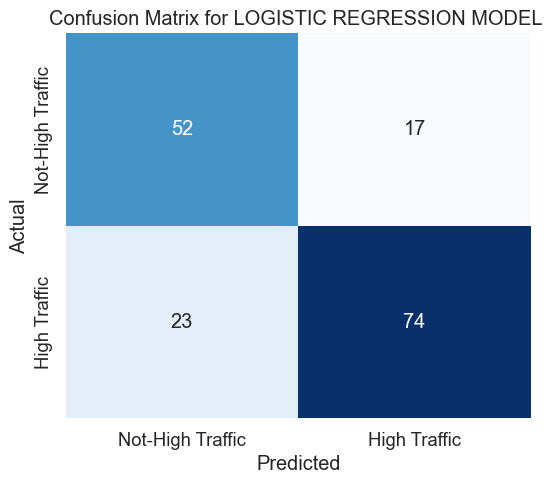

*****LOGISTIC REGRESSION MODEL*****
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72        69
           1       0.81      0.76      0.79        97

    accuracy                           0.76       166
   macro avg       0.75      0.76      0.75       166
weighted avg       0.76      0.76      0.76       166



In [51]:
from sklearn.metrics import confusion_matrix, classification_report


conf_matrix = confusion_matrix(y_test, y_pred_logreg)
class_report = classification_report(y_test, y_pred_logreg)

sns.set(font_scale=1.2)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=["Not-High Traffic", "High Traffic"],
            yticklabels=["Not-High Traffic", "High Traffic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LOGISTIC REGRESSION MODEL ')
plt.show()

print("*****LOGISTIC REGRESSION MODEL*****")
print("Classification Report:\n", class_report)

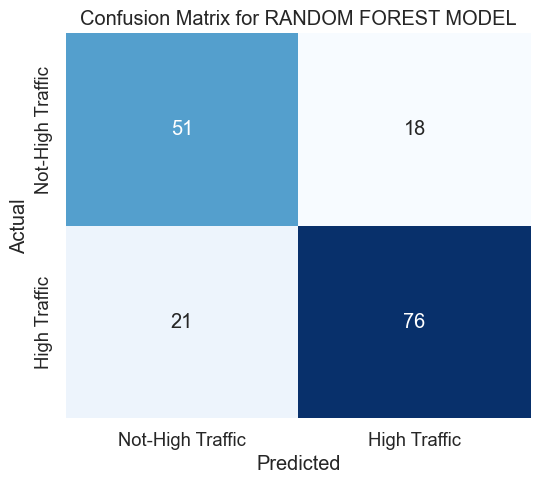

*****RANDOM FOREST MODEL*****
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72        69
           1       0.81      0.78      0.80        97

    accuracy                           0.77       166
   macro avg       0.76      0.76      0.76       166
weighted avg       0.77      0.77      0.77       166



In [52]:

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

sns.set(font_scale=1.2)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=["Not-High Traffic", "High Traffic"],
            yticklabels=["Not-High Traffic", "High Traffic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RANDOM FOREST MODEL')
plt.show()

print("*****RANDOM FOREST MODEL*****")
print("Classification Report:\n", class_report_rf)

Indeed, the results from both models demonstrate quite similar precision scores, with a slight edge for the random forest model, given its higher F1 score. This suggests that the random forest model performs slightly better in achieving the balance between minimizing false positives and false negatives, making it a favorable choice for this classification task.

## **Feature Importance**

Since we have chosen the random forest model so it is so important for the business owner to focus on the important features that lead to higher true prediction 

In [53]:
feature_importance = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("FEATURE IMPORTANCE BY RANDOM FOREST")
print(importance_df)

FEATURE IMPORTANCE BY RANDOM FOREST
        Feature  Importance
4      category    0.587093
3       protein    0.171622
2         sugar    0.076001
0      calories    0.069699
1  carbohydrate    0.057876
5      servings    0.037710


In [54]:
import pickle


pickle.dump(rf, open("model.pkl", "wb"))


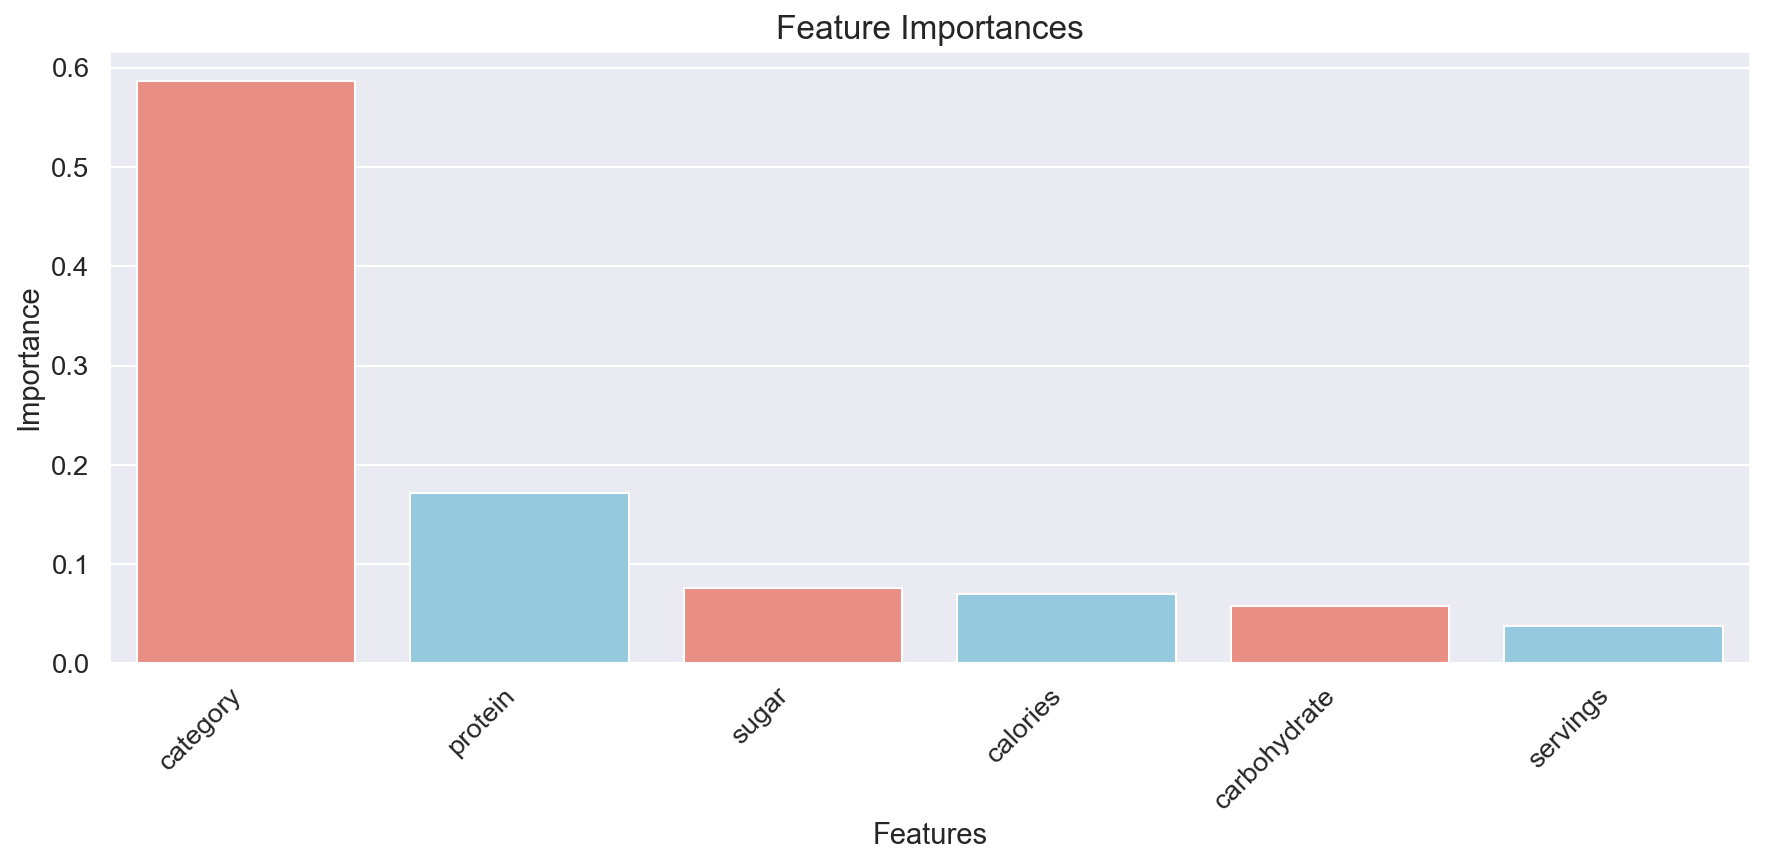

In [55]:
plt.figure(figsize=(12, 6), dpi=150)  
features = list(rf.feature_importances_)
feature_names = df.columns[:-1]  

features_importance = dict(zip(feature_names, features))
sorted_features_importance = dict(sorted(features_importance.items(), key=lambda x: x[1], reverse=True))

sns.barplot(x=list(sorted_features_importance.keys()), y=list(sorted_features_importance.values()),
            palette=['salmon', 'skyblue'])

plt.xticks(rotation=45, ha='right') 
plt.xlabel('Features', fontsize=14)  
plt.ylabel('Importance', fontsize=14)  
plt.title('Feature Importances', fontsize=16) 
plt.tight_layout() 
plt.show()


In conclusion, our analysis highlights the significance of the "category" variable in determining recipe popularity. Combining this insight with the top-ranking categories from the data visualization part, namely vegetables, potato, pork, one-dish meal, and meat, we can prioritize displaying recipes from these categories on the website. Additionally, the "protein" feature emerges as a crucial factor, contributing to approximately 20% of the recipe's popularity. Furthermore, our findings indicate a positive correlation between protein content and high website traffic, emphasizing its importance in attracting visitors to the website. Integrating these insights can guide the selection and presentation of recipes, enhancing the user experience and engagement on the platform.

### _**Recommendation**_

After this whole analysis ,the business owner have to:
   *Enhance Data Quality: Implement measures to ensure better raw data quality, addressing issues such as missing values in        nutritional features.

   *Highlight Protein-rich Recipes: Given the significance of protein content, prioritize showcasing recipes that are rich in protein. This aligns with the observed importance of protein in attracting website traffic and user engagement.

   *Explore Calorie, Carbohydrate, and Servings Information: Increase the visibility of recipes that provide detailed information about calories, carbohydrates, and servings. These details are valuable for users and can contribute to a better user experience.

   *Reduce Sugar-rich Recipes: Based on the analysis indicating a lower relevance of sugar content, limit the display of recipes high in sugar

   *Monitor Precision and Non-Popular Recipes: Continuously monitor the precision metric, especially for non-popular recipes. This ensures the accuracy of predictions and minimizes false positives, enhancing the user experience. For popular recipes, consider analyzing a larger and more balanced dataset without missing values, enabling a more in-depth analysis.